In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import timedelta
import plotly.graph_objects as go

In [2]:
df_covid = pd.read_csv("covid_19_india.csv",index_col='Sno')
df_covid.head()

Date     Time State/UnionTerritory ConfirmedIndianNational  \
Sno                                                                   
1    30/01/20  6:00 PM               Kerala                       1   
2    31/01/20  6:00 PM               Kerala                       1   
3    01/02/20  6:00 PM               Kerala                       2   
4    02/02/20  6:00 PM               Kerala                       3   
5    03/02/20  6:00 PM               Kerala                       3   

    ConfirmedForeignNational  Cured  Deaths  Confirmed  
Sno                                                     
1                          0      0       0          1  
2                          0      0       0          1  
3                          0      0       0          2  
4                          0      0       0          3  
5                          0      0       0          3

In [3]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254 entries, 1 to 1254
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      1254 non-null   object
 1   Time                      1254 non-null   object
 2   State/UnionTerritory      1254 non-null   object
 3   ConfirmedIndianNational   1254 non-null   object
 4   ConfirmedForeignNational  1254 non-null   object
 5   Cured                     1254 non-null   int64 
 6   Deaths                    1254 non-null   int64 
 7   Confirmed                 1254 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 88.2+ KB


In [4]:
df_covid.shape

(1254, 8)

In [5]:
df_covid.isnull().sum()

Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [6]:
df_covid["Date"]=pd.to_datetime(df_covid["Date"])

In [7]:
df_covid.head()

Date     Time State/UnionTerritory ConfirmedIndianNational  \
Sno                                                                    
1   2020-01-30  6:00 PM               Kerala                       1   
2   2020-01-31  6:00 PM               Kerala                       1   
3   2020-01-02  6:00 PM               Kerala                       2   
4   2020-02-02  6:00 PM               Kerala                       3   
5   2020-03-02  6:00 PM               Kerala                       3   

    ConfirmedForeignNational  Cured  Deaths  Confirmed  
Sno                                                     
1                          0      0       0          1  
2                          0      0       0          1  
3                          0      0       0          2  
4                          0      0       0          3  
5                          0      0       0          3

In [8]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254 entries, 1 to 1254
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      1254 non-null   datetime64[ns]
 1   Time                      1254 non-null   object        
 2   State/UnionTerritory      1254 non-null   object        
 3   ConfirmedIndianNational   1254 non-null   object        
 4   ConfirmedForeignNational  1254 non-null   object        
 5   Cured                     1254 non-null   int64         
 6   Deaths                    1254 non-null   int64         
 7   Confirmed                 1254 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 88.2+ KB


In [9]:
df_covid.columns

Index(['Date', 'Time', 'State/UnionTerritory', 'ConfirmedIndianNational',
       'ConfirmedForeignNational', 'Cured', 'Deaths', 'Confirmed'],
      dtype='object')

In [10]:
df_covid.drop("Time",inplace = True,axis = 1)

In [11]:
df_covid.columns

Index(['Date', 'State/UnionTerritory', 'ConfirmedIndianNational',
       'ConfirmedForeignNational', 'Cured', 'Deaths', 'Confirmed'],
      dtype='object')

In [12]:
df_covid.shape

(1254, 7)

In [13]:
df_covid.describe()

Cured       Deaths    Confirmed
count  1254.000000  1254.000000  1254.000000
mean     24.524721     5.771930   186.789474
std      72.485487    22.301403   485.907171
min       0.000000     0.000000     0.000000
25%       0.000000     0.000000     3.000000
50%       1.000000     0.000000    18.000000
75%      14.000000     3.000000   109.750000
max     789.000000   269.000000  5652.000000

In [14]:
df_covid

Date State/UnionTerritory ConfirmedIndianNational  \
Sno                                                            
1    2020-01-30               Kerala                       1   
2    2020-01-31               Kerala                       1   
3    2020-01-02               Kerala                       2   
4    2020-02-02               Kerala                       3   
5    2020-03-02               Kerala                       3   
...         ...                  ...                     ...   
1250 2020-04-23            Telengana                       -   
1251 2020-04-23              Tripura                       -   
1252 2020-04-23          Uttarakhand                       -   
1253 2020-04-23        Uttar Pradesh                       -   
1254 2020-04-23          West Bengal                       -   

     ConfirmedForeignNational  Cured  Deaths  Confirmed  
Sno                                                      
1                           0      0       0          1  
2                           0      0       0          1  
3                           0      0       0          2  
4                           0      0       0          3  
5                           0      0       0          3  
...                       ...    ...     ...        ...  
1250                        -    197      24        960  
1251                        -      1       0          2  
1252                        -     23       0         46  
1253                        -    187      21       1509  
1254                        -     79      15        456  

[1254 rows x 7 columns]

In [15]:
Confirmed = df_covid.groupby('Date').sum()['Confirmed'].reset_index()
Cured = df_covid.groupby('Date').sum()['Cured'].reset_index()
Deaths = df_covid.groupby('Date').sum()['Deaths'].reset_index()
Deaths.head()

Date  Deaths
0 2020-01-02       0
1 2020-01-03       0
2 2020-01-04      41
3 2020-01-30       0
4 2020-01-31       0

In [16]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = Confirmed['Date'] , y = Confirmed['Confirmed'], mode = 'lines+markers' ,  name = 'Confirmed' , line = dict(color = 'orange', width = 2)))
fig.add_trace(go.Scatter(x = Cured['Date'] , y = Cured['Cured'], mode = 'lines+markers' ,  name = 'Cured' , line = dict(color = 'green', width = 2)))
fig.add_trace(go.Scatter(x = Deaths['Date'] , y = Deaths['Deaths'], mode = 'lines+markers' ,  name = 'Deaths' , line = dict(color = 'blue', width = 2)))
fig.update_layout(title = 'Covid-19 cases' , xaxis_tickfont_size = 14 ,yaxis_tickfont_size = 14 , yaxis = dict(title = 'Number of Cases'))
fig.show()

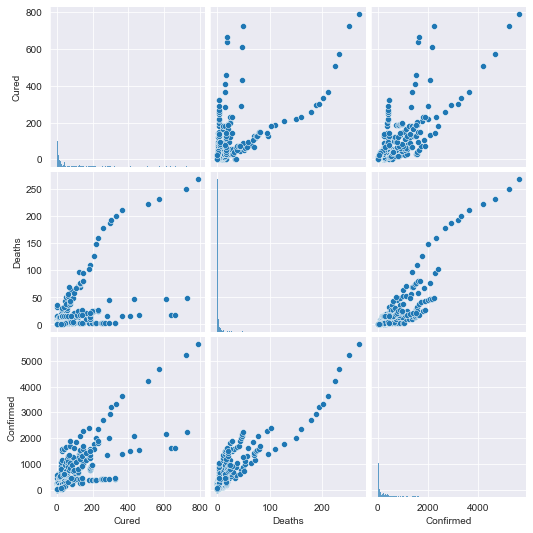

In [17]:
sns.set_style('darkgrid')
sns.pairplot(df_covid)

In [18]:
df_covid.corr()

Cured    Deaths  Confirmed
Cured      1.000000  0.675532   0.824658
Deaths     0.675532  1.000000   0.894660
Confirmed  0.824658  0.894660   1.000000

Text(0.5, 1.0, 'df_covid.corr()')

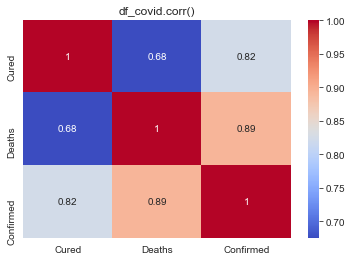

In [19]:
sns.heatmap(df_covid.corr(),cmap='coolwarm',annot=True)
plt.title('df_covid.corr()')

In [20]:
df=df_covid[df_covid['Date']==max(df_covid['Date'])]
fig = px.treemap(df.sort_values(by = 'Confirmed',ascending = False).reset_index(drop=True),
                 path =['State/UnionTerritory'], values = 'Confirmed' , height= 700,
                 title = 'Number of Confirmed Cases in India',
                color_discrete_sequence = px.colors.qualitative.Dark2)
fig.data[0].textinfo = 'label+text+value'
fig.show()